# Basic Settings

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

# 연령별 미혼모, 미혼부 비교

## 분석 목적 : 연령별 천안시의 미혼모, 미혼부 현황에 대해 분석

## 분석 방향
1. 충청남도의 연령별 미혼모, 미혼부 현황 확인
2. 충청남도 전체 인구의 미혼모, 미혼부 비율 확인
3. 다른 지역에 비해 미혼모, 미혼부 비율이 높은지 확인
4. 과거에 비해 충청남도의 미혼모, 미혼부 비율이 높아지고 있는지 확인



### data 불러오기

In [4]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 출산율 data 불러오기

# CSV 파일 경로 지정
file_path01 = '/content/drive/MyDrive/천안_공공데이터_활용_정책제안/연령별_미혼모__미혼부__시도_20240731115600.csv'
file_path02 = '/content/drive/MyDrive/천안_공공데이터_활용_정책제안/연령_및_성별_인구_–_읍면동_20240731115421.csv'
# CSV 파일을 DataFrame으로 읽어오기
single_mother_father = pd.read_csv(file_path01, encoding='euc-kr')
total_population = pd.read_csv(file_path02, encoding='euc-kr')


# 데이터 전처리

In [6]:
single_mother_father.rename(columns={'행정구역별(시도)':'행정구역별'},inplace=True)
total_population.rename(columns={'행정구역별(읍면동)':'행정구역별'},inplace=True)
total_population.rename(columns={'총인구(명)':'총인구'},inplace=True)
total_population.rename(columns={'총인구_남자(명)':'남자'},inplace=True)
total_population.rename(columns={'총인구_여자(명)':'여자'},inplace=True)


In [7]:
single_mother_father['미혼모'] = single_mother_father['미혼모'].str.replace('X', '0').astype(int)
single_mother_father['미혼부'] = single_mother_father['미혼부'].str.replace('X', '0').astype(int)
single_mother_father['미혼모_미혼부'] = single_mother_father['미혼모'] + single_mother_father['미혼부']
total_population['연령별'] = total_population['연령별'].replace('합계', '계')

In [8]:
total_population['연령별'] = total_population['연령별'].replace('15~19세', '20세미만')
total_population['연령별'] = total_population['연령별'].replace('15세미만', '20세미만')
total_population['연령별'] = total_population['연령별'].replace('50~54세', '50세이상')
total_population['연령별'] = total_population['연령별'].replace('55~59세', '50세이상')
total_population['연령별'] = total_population['연령별'].replace('60~64세', '50세이상')
total_population['연령별'] = total_population['연령별'].replace('65세이상', '50세이상')
total_population = total_population.groupby(['시점','행정구역별','연령별'])[['총인구','남자','여자']].sum().reset_index()
single_mother_father

,시점,행정구역별,연령별,미혼모,미혼부,미혼모_미혼부
0,2015,전국,계,24487,10601,35088
1,2015,전국,20세미만,350,84,434
2,2015,전국,20~24세,1929,414,2343
3,2015,전국,25~29세,3013,494,3507
4,2015,전국,30~34세,4078,1219,5297
...,...,...,...,...,...,...
1453,2023,제주특별자치도,30~34세,59,11,70
1454,2023,제주특별자치도,35~39세,61,13,74
1455,2023,제주특별자치도,40~44세,89,20,109
1456,2023,제주특별자치도,45~49세,64,20,84


In [9]:
# df_melted = single_mother_father_ratio.melt(id_vars=['시점','행정구역별','연령별'], value_vars=['미혼모', '미혼부','미혼모_미혼부','총인구','남자','여자','미혼모_비율','미혼부_비율','미혼모_미혼부_비율'],
#                     var_name='유형', value_name='수')
# df_melted.to_csv('single_mother_father_ratio.csv', index=False)

NameError: name 'single_mother_father_ratio' is not defined

In [10]:
single_mother_father_ratio=pd.merge(single_mother_father, total_population, on=['시점','행정구역별','연령별'], how='inner')
single_mother_father_ratio['미혼모_비율'] = single_mother_father_ratio['미혼모'] / single_mother_father_ratio['여자']
single_mother_father_ratio['미혼부_비율'] = single_mother_father_ratio['미혼모'] / single_mother_father_ratio['남자']
single_mother_father_ratio['미혼모_미혼부_비율'] = single_mother_father_ratio['미혼모_미혼부'] / single_mother_father_ratio['총인구']
# single_mother_father_ratio = single_mother_father_ratio[['시점','행정구역별','연령별','미혼모_비율','미혼부_비율','미혼모_미혼부_비율']]
single_mother_father_ratio.to_csv('single_mother_father_ratio.csv', index=False)
single_mother_father_ratio


,시점,행정구역별,연령별,미혼모,미혼부,미혼모_미혼부,총인구,남자,여자,미혼모_비율,미혼부_비율,미혼모_미혼부_비율
0,2015,전국,계,24487,10601,35088,51069375,25608502,25460873,0.000962,0.000956,0.000687
1,2015,전국,20세미만,350,84,434,10148392,5260234,4888158,0.000072,0.000067,0.000043
2,2015,전국,20~24세,1929,414,2343,3531108,1887776,1643332,0.001174,0.001022,0.000664
3,2015,전국,25~29세,3013,494,3507,3265288,1728888,1536400,0.001961,0.001743,0.001074
4,2015,전국,30~34세,4078,1219,5297,3811610,1986796,1824814,0.002235,0.002053,0.001390
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2023,제주특별자치도,30~34세,59,11,70,42680,22675,20005,0.002949,0.002602,0.001640
1454,2023,제주특별자치도,35~39세,61,13,74,42494,21727,20767,0.002937,0.002808,0.001741
1455,2023,제주특별자치도,40~44세,89,20,109,57168,28793,28375,0.003137,0.003091,0.001907
1456,2023,제주특별자치도,45~49세,64,20,84,53840,27785,26055,0.002456,0.002303,0.001560


# 충청남도의 연령별 미혼모, 미혼부 현황 확인

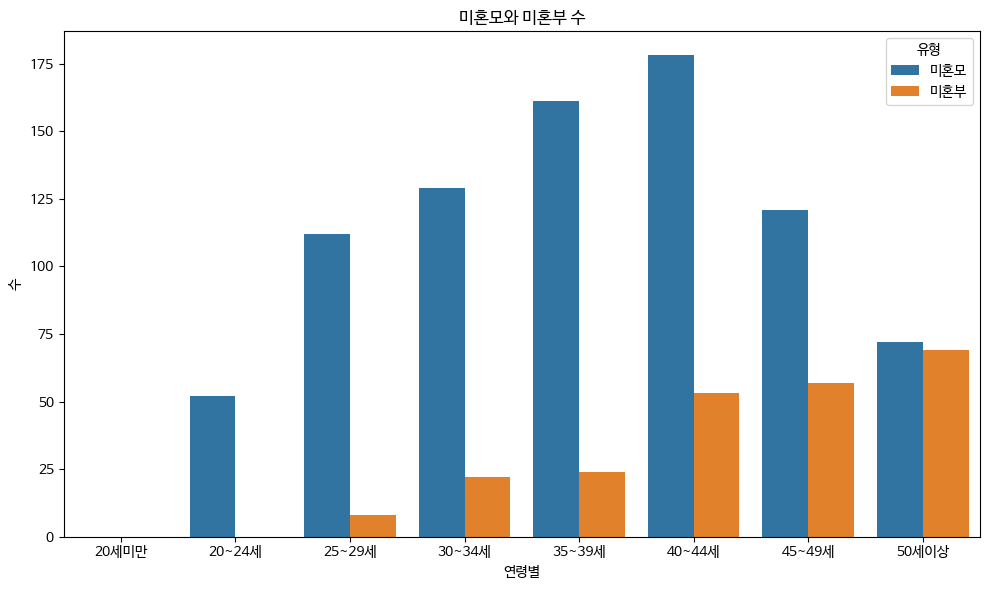

In [11]:
# 데이터 필터링
df = single_mother_father[(single_mother_father['행정구역별'] == '충청남도') &
                           (single_mother_father['연령별'] != '계') &
                           (single_mother_father['시점'] == 2023)]

# 데이터 변형: '미혼모'와 '미혼부'를 하나의 열로 변환
df_melted = df.melt(id_vars=['연령별'], value_vars=['미혼모', '미혼부',],
                    var_name='유형', value_name='수')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='연령별', y='수', hue='유형')

# 그래프 설정
plt.xlabel('연령별')
plt.ylabel('수')
plt.title('미혼모와 미혼부 수')
plt.legend(title='유형')

# 그래프 표시
plt.tight_layout()
plt.show()


# 충청남도 전체 인구의 미혼모, 미혼부 비율 확인

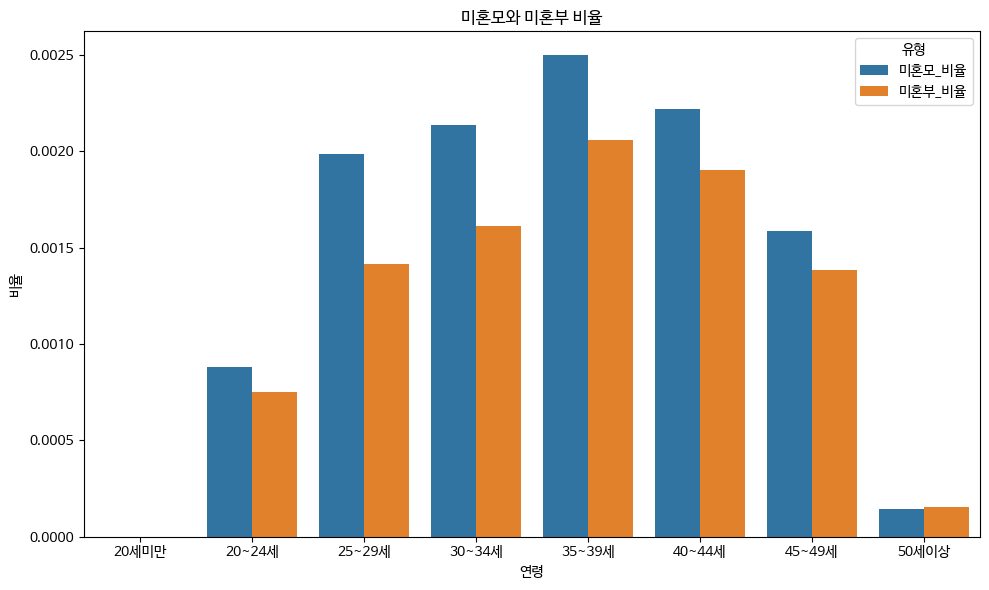

In [15]:
df = single_mother_father_ratio[(single_mother_father_ratio['행정구역별'] == '충청남도') &
                           (single_mother_father_ratio['연령별'] != '계') &
                           (single_mother_father_ratio['시점'] == 2023)]

# 데이터 변형: '미혼모'와 '미혼부'를 하나의 열로 변환
df_melted = df.melt(id_vars=['연령별'], value_vars=['미혼모_비율', '미혼부_비율'],
                    var_name='유형', value_name='수')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='연령별', y='수', hue='유형')

# 그래프 설정
plt.xlabel('연령')
plt.ylabel('비율')
plt.title('미혼모와 미혼부 비율')
plt.legend(title='유형')

# 그래프 표시
plt.tight_layout()
plt.show()


# 다른 지역에 비해 미혼모 미혼부의 비율이 높은지 확인

In [ ]:
df = single_mother_father_ratio[ (single_mother_father_ratio['연령별'] == '계')&
                                  (single_mother_father_ratio['행정구역별'] != '전국')&
                           (single_mother_father_ratio['시점'] == 2023)].sort_values('미혼모_미혼부_비율',ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='행정구역별', y='미혼모_미혼부_비율')

# 그래프 설정
plt.xlabel('지역별')
plt.ylabel('비율')
plt.title('지역별 미혼모와 미혼부 비율')
plt.xticks(rotation=45)

# 그래프 표시
plt.show()


# 시간에 따른 충청남도의 미혼모, 미혼부 변화 확인

In [ ]:
df = single_mother_father[(single_mother_father['행정구역별'] == '충청남도') &
                           (single_mother_father['연령별'] == '계')]

# 데이터 변형: '미혼모'와 '미혼부'를 하나의 열로 변환
df_melted = df.melt(id_vars=['시점'], value_vars=['미혼모', '미혼부'],
                    var_name='유형', value_name='수')

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='시점', y='수', hue='유형')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('수')
plt.title('시간에 따른 미혼모와 미혼부 수 변화')
plt.legend(title='유형')

# 그래프 표시
plt.tight_layout()
plt.show()


# 시간에 따른 충청남도의 미혼모, 미혼부 비율 변화 확인

In [ ]:
df = single_mother_father_ratio[(single_mother_father_ratio['행정구역별'] == '충청남도') &
                           (single_mother_father_ratio['연령별'] == '계')]

# 데이터 변형: '미혼모'와 '미혼부'를 하나의 열로 변환
df_melted = df.melt(id_vars=['시점'], value_vars=['미혼모_비율', '미혼부_비율'],
                    var_name='유형', value_name='수')

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='시점', y='수', hue='유형')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('시간에 따른 미혼모와 미혼부 비율 변화')
plt.legend(title='유형')

# 그래프 표시
plt.tight_layout()
plt.show()


# 시간에 따른 충청남도의 연령별 미혼모, 미혼부 비율 변화 확인

In [ ]:
df = single_mother_father_ratio[(single_mother_father_ratio['행정구역별'] == '충청남도') &
                           (single_mother_father_ratio['연령별'] != '계')]


# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='시점', y='미혼모_미혼부_비율', hue='연령별')

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('시간에 따른 미혼모와 미혼부 비율 변화')
plt.legend(title='유형')

# 그래프 표시
plt.tight_layout()
plt.show()


# 결론
- 충남시의 연령별 미혼모, 미혼부의 수는 40-44,35-39,45-49,30-34 순으로 많음
- 충남시의 연령별 미혼모, 미혼부의 비율은 40-44,35-39,30-34,45-49 순으로 많음

- 지역별 미혼모와 미혼부의 비율 확인 결과, 제주, 광주 광역시,인천 광역시가 높은 수치를 기록함. 충남의 경우 8번째로 높음
- 시간에 따른 충남시의 미혼모, 미혼부의 수와 비율 변화 확인 결과 점차 감소하고 있음.
- 시간에 따른 충남시의 미혼모, 미혼부의 비율 변화 확인 결과 연령간의 차이가 일정함
- 전체 인원 중 미혼모, 미혼부 비율로 비교하여 수치가 너무 낮게 나오고 정확한 비율 계산이 어려움. -> 자녀가 있는 가구에 대한 데이터가 있으면 더 정확한 비교가 가능하겠지만, 관련 데이터를 찾는데 실패함.
